In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
im = np.zeros((64, 64))
np.random.seed(2)
x, y = (63*np.random.random((2, 8))).astype(np.int)
im[x, y] = np.arange(8)

In [6]:
bigger_points = ndimage.grey_dilation(im, size=(5, 5), structure=np.ones((5, 5)))

In [7]:
square = np.zeros((16, 16))
square[4:-4, 4:-4] = 1
dist = ndimage.distance_transform_bf(square)
dilate_dist = ndimage.grey_dilation(dist, size=(3, 3), \
        structure=np.ones((3, 3)))

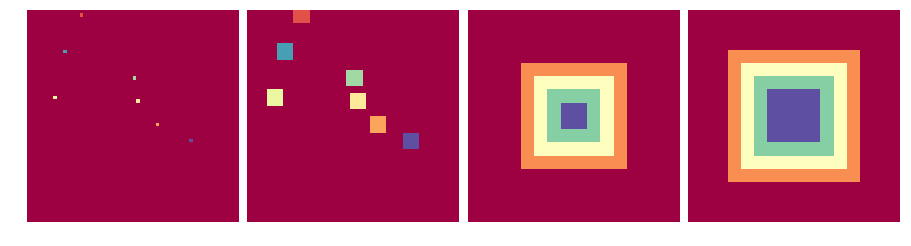

In [9]:
plt.figure(figsize=(12.5, 3))
plt.subplot(141)
plt.imshow(im, interpolation='nearest', cmap="Spectral")
plt.axis('off')
plt.subplot(142)
plt.imshow(bigger_points, interpolation='nearest', cmap="Spectral")
plt.axis('off')
plt.subplot(143)
plt.imshow(dist, interpolation='nearest', cmap="Spectral")
plt.axis('off')
plt.subplot(144)
plt.imshow(dilate_dist, interpolation='nearest', cmap="Spectral")
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

In [14]:
a = np.zeros((7,7), dtype=np.int)
a[1:6, 2:5] = 1
a

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [15]:
ndimage.binary_erosion(a).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [16]:
#Erosion removes objects smaller than the structure
ndimage.binary_erosion(a, structure=np.ones((5,5))).astype(a.dtype)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [17]:
a = np.zeros((5, 5))
a[2, 2] = 1
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [18]:
ndimage.binary_dilation(a).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [19]:
ndimage.binary_dilation(a, structure=np.ones((3,3))).astype(a.dtype)

array([[0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0.]])

### Opening: erosion + dilation:

In [21]:
square = np.zeros((32, 32))
square[10:-10, 10:-10] = 1
np.random.seed(2)
x, y = (32*np.random.random((2, 20))).astype(np.int)
square[x, y] = 1

In [22]:
open_square = ndimage.binary_opening(square)

eroded_square = ndimage.binary_erosion(square)
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)

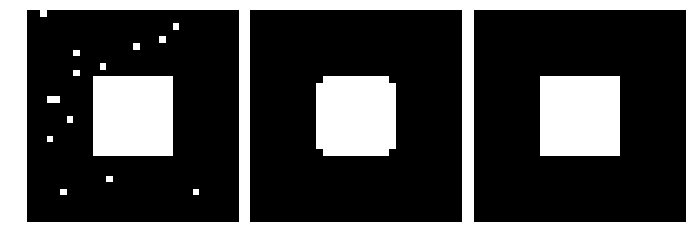

In [23]:
plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(open_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()

### Closing: dilation + erosion

In [27]:
square = np.zeros((32, 32))
square[5:-15, 5:-15] = 1
square[15:-5, 15:-5] = 1
# np.random.seed(2)
# x, y = (32*np.random.random((2, 20))).astype(np.int)
# square[x, y] = 1

In [28]:
close_square = ndimage.binary_closing(square)

eroded_square = ndimage.binary_erosion(square)
reconstruction = ndimage.binary_propagation(eroded_square, mask=square)

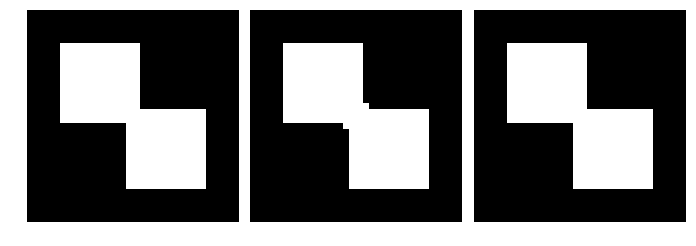

In [29]:
plt.figure(figsize=(9.5, 3))
plt.subplot(131)
plt.imshow(square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(close_square, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.imshow(reconstruction, cmap=plt.cm.gray, interpolation='nearest')
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0.02, top=0.99, bottom=0.01, left=0.01, right=0.99)
plt.show()